# Exploratory Data Analysis Notebook

The following file contains EDA on the cleaned data set. I analyzed various features with how they relate to the data analyst salaries including

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('clean_salary_data.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.sample(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,simplified_title,seniority,salary_range,min_salary,max_salary,avg_salary,company_age,company_name,state,city,headquarters_state,same_location,size_range,min_size,max_size,avg_size,python,sql,excel,R,deep_learning,PhD,bachelor,masters,power_bi,tableau,prob_solver,critical_thinker
1175,SR BUSINESS DATA ANALYST PRN,$64K-$113K (Glassdoor est.),Short Description\n\nWork with business leader...,3.3,Cooper University Health Care\n3.3,"Camden, NJ","Camden, NJ",5001 to 10000 employees,1887,Hospital,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,data analyst,senior,$64-$113,64,113,88.5,134,Cooper University Health Care,NJ,Camden,NJ,1,5001 to 10000,5001,10000,7500.5,0,0,1,1,0,0,1,1,0,0,0,1
1661,Data Analyst,$42K-$76K (Glassdoor est.),Ref ID: 04160-9502602115Classification: Data A...,3.5,Robert Half\n3.5,"Austin, TX","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,data analyst,na,$42-$76,42,76,59.0,73,Robert Half,TX,Austin,CA,0,10000+,10000,30000,20000.0,0,1,1,1,0,0,1,1,0,0,0,0
293,Senior Data Analyst (Product),$27K-$52K (Glassdoor est.),OVERVIEW\nAbleTo is the leading provider of hi...,4.3,AbleTo\n4.3,"New York, NY","New York, NY",51 to 200 employees,2008,Company - Private,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,-1,data analyst,senior,$27-$52,27,52,39.5,13,AbleTo,NY,New York,NY,1,51 to 200,51,200,125.5,0,1,0,1,0,0,1,0,0,1,1,0
2203,DMV/DC Data Services Analyst – Analyst II,$49K-$91K (Glassdoor est.),Department Information\nThe Colorado Departmen...,3.3,State of Colorado\n3.3,"Lakewood, CO","Denver, CO",10000+ employees,-1,Government,State & Regional Agencies,Government,Unknown / Non-Applicable,-1,-1,other,na,$49-$91,49,91,70.0,-1,State of Colorado,CO,Lakewood,CO,1,10000+,10000,30000,20000.0,0,1,1,1,0,0,1,1,0,0,0,0
1676,Data Analyst/Data Entry/Federal Data Entry/Dat...,$53K-$104K (Glassdoor est.),Role Title: Data Analyst/Data Specialist\n\nIN...,3.9,"ARK Solutions, Inc.\n3.9","Austin, TX","Gainesville, VA",1 to 50 employees,2015,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,-1,-1,data analyst,na,$53-$104,53,104,78.5,6,"ARK Solutions, Inc.",TX,Austin,VA,0,1 to 50,1,50,25.5,0,0,0,1,0,0,1,0,0,0,0,0
1231,Senior Data Analyst,$73K-$89K (Glassdoor est.),We have the below role open with our direct en...,3.3,Convene Technologies\n3.3,"San Antonio, TX","Tampa, FL",51 to 200 employees,2005,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1,data analyst,senior,$73-$89,73,89,81.0,16,Convene Technologies,TX,San Antonio,FL,0,51 to 200,51,200,125.5,1,1,1,1,0,0,1,0,0,0,1,0
622,REMOTE Data Analyst - POWER BI+MONGO+ DAX EXPE...,$35K-$45K (Glassdoor est.),Company Description\n\nCatasys is making a pos...,-1.0,Catasys Health,"Santa Monica, CA",-1,-1,-1,-1,-1,-1,-1,-1,-1,data analyst,na,$35-$45,35,45,40.0,-1,Catasys Health,CA,Santa Monica,-1,0,-1,0,0,750.5,0,0,1,1,0,0,1,0,0,0,0,0
1819,Data Management Analyst,$50K-$86K (Glassdoor est.),MUST BE ABLE TO WORK ON A W2 WITHOUT SPONSORSH...,3.9,"TEKsystems, Inc\n3.9","Charlotte, NC","Hanover, MD",1001 to 5000 employees,1983,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Capgemini, Slalom, Accenture",-1,data management,na,$50-$86,50,86,68.0,38,"TEKsystems, Inc",NC,Charlotte,MD,0,1001 to 5000,1001,5000,3000.5,0,0,1,1,0,0,1,0,0,0,0,0
1929,Data Studio Analyst,$99K-$178K (Glassdoor est.),"At Priceonomics, our core skill is making data...",5.0,Priceonomics\n5.0,"San Francisco, CA","San Francisco, CA",1 to 50 employees,-1,Company - Private,Internet,Information Technology,Less than $1 million (USD),-1,-1,other,na,$99-$178,99,178,138.5,-1,Priceonomics,CA,San Francisco,CA,1,1 to 50,1,50,25.5,0,0,1,1,0,1,1,0,

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'simplified_title', 'seniority', 'salary_range',
       'min_salary', 'max_salary', 'avg_salary', 'company_age', 'company_name',
       'state', 'city', 'headquarters_state', 'same_location', 'size_range',
       'min_size', 'max_size', 'avg_size', 'python', 'sql', 'excel', 'R',
       'deep_learning', 'PhD', 'bachelor', 'masters', 'power_bi', 'tableau',
       'prob_solver', 'critical_thinker'],
      dtype='object')

In [6]:
#Look at the clean features. These are the potential features for our models. 
features=['Rating','Location', 'Headquarters', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Easy Apply', 'simplified_title', 'seniority',
       'min_salary', 'max_salary', 'avg_salary', 'company_age', 'company_name',
       'state', 'city', 'headquarters_state', 'same_location',
       'min_size', 'max_size', 'avg_size', 'python', 'sql', 'excel',
       'deep_learning', 'PhD', 'bachelor', 'masters', 'power_bi', 'tableau']
df=df[features]
df.sample(10)

,Rating,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,simplified_title,seniority,min_salary,max_salary,avg_salary,company_age,company_name,state,city,headquarters_state,same_location,min_size,max_size,avg_size,python,sql,excel,deep_learning,PhD,bachelor,masters,power_bi,tableau
503,3.3,"Norfolk, VA","Fairfax, VA",2000,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,other,na,49,112,80.5,21,Universal Consulting Services,VA,Norfolk,VA,1,201,500,350.5,0,0,1,0,0,1,1,0,0
121,3.5,"New York, NY","New York, NY",1845,Company - Private,Insurance Agencies & Brokerages,Insurance,$10+ billion (USD),-1,data analyst,na,59,85,72.0,176,New York Life Insurance Co,NY,New York,NY,1,10000,30000,20000.0,1,1,1,0,0,1,0,0,0
789,3.2,"Chicago, IL","Atlanta, GA",1983,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,True,other,na,67,92,79.5,38,PDI Software,IL,Chicago,GA,0,501,1000,750.5,1,1,1,0,0,1,0,0,0
1361,4.1,"Dallas, TX","Utica, MI",2004,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,other,na,30,53,41.5,17,A-Line Staffing Solutions,TX,Dallas,MI,0,501,1000,750.5,1,1,1,0,0,1,1,0,1
911,4.0,"Houston, TX","Plainsboro, NJ",-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,other,na,29,38,33.5,-1,Lorven Technologies Inc,TX,Houston,NJ,0,1,50,25.5,0,0,0,0,0,1,0,0,0
1447,4.0,"Richardson, TX","Plainsboro, NJ",-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,data analyst,senior,48,88,68.0,-1,Lorven Technologies Inc,TX,Richardson,NJ,0,1,50,25.5,0,0,1,0,0,1,0,0,0
2159,4.0,"Denver, CO","San Francisco, CA",2008,Company - Public,Internet,Information Technology,$1 to $2 billion (USD),True,data analyst,senior,57,67,62.0,13,Twilio,CO,Denver,CA,0,1001,5000,3000.5,1,1,1,0,0,1,0,0,0
1851,4.0,"Charlotte, NC","Ashburn, VA",2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,data analyst,na,54,75,64.5,11,CYNET SYSTEMS,NC,Charlotte,VA,0,501,1000,750.5,0,1,1,0,0,1,0,0,0
468,3.4,"Chesapeake, VA","Wilmington, NC",-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,data analyst,na,43,69,56.0,-1,Dunhill Professional Search,VA,Chesapeake,NC,0,1,50,25.5,0,1,1,0,0,1,0,0,0
400,3.8,"Jersey City, NJ","Paris, France",1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,$10+ billion (USD),-1,data analyst,senior,48,96,72.0,54,Capgemini,NJ,Jersey City,France,0,10000,30000,20000.0,0,1,0,0,0,1,0,0,0


In [7]:
#get an understanding from each of the variables 
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,company_age,same_location,min_size,max_size,avg_size,python,sql,excel,deep_learning,PhD,bachelor,masters,power_bi,tableau
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.0,2252.000000,2252.000000,2252.000000
mean,3.160080,1398.255329,54.266874,89.979130,72.123002,29.858348,0.418739,2114.108348,6392.917407,4321.831039,0.282860,0.611901,0.600799,0.004885,0.021758,1.0,0.365009,0.079929,0.275311
std,1.665393,902.040151,19.575375,29.315605,23.600734,44.857105,0.493462,3667.279990,10832.783480,7203.286825,0.450489,0.487426,0.489843,0.069734,0.145926,0.0,0.481540,0.271243,0.446770
min,-1.000000,-1.000000,24.000000,38.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,3.100000,-1.000000,41.000000,70.000000,58.000000,-1.000000,0.000000,51.000000,200.000000,125.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,3.600000,1979.000000,50.000000,87.000000,69.000000,17.000000,0.000000,201.000000,500.000000,750.500000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,4.000000,2002.000000,64.000000,104.000000,80.500000,34.250000,1.000000,1001.000000,5000.000000,3000.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000
max,5.000000,2019.000000,113.000000,190.000000,150.000000,339.000000,1.000000,10000.000000,30000.000000,20000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


- Some things to consider:  
    - Average rating about 3.16
    - Average salary is about 72.12
    - Average company age about 30
    - 40% had the job posting in the same location
    - average size was about 4000 people 
    - 28% of companies wanted Python skills
    - About 60% wanted both sql or excel 
    - 100% wanted at least a bachelor's degree
    - 2% only wanted a PhD
    - 36% mentioned a masters in the title 
    - 27% wanted Tableau over the 7% that wanted Power BI

<Figure size 720x720 with 0 Axes>

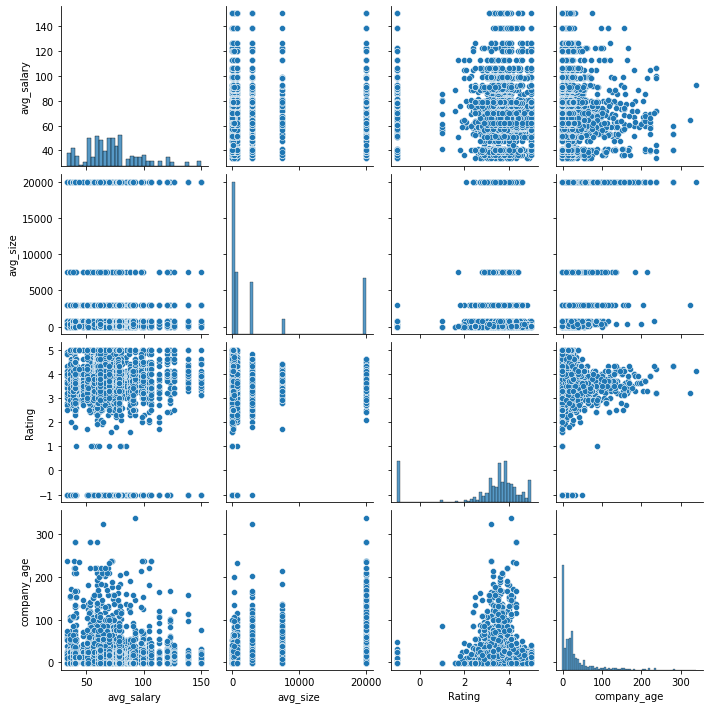

In [6]:
#relating the average salary, to average size, and rating 
plt.figure(figsize=(10,10))
sns.pairplot(df[['avg_salary', 'avg_size', 'Rating', 'company_age']])
plt.show()

In [137]:
#let's get a clearer picture of the histograms to see if there is some scaling that may need to be done
def histogram(df, x):
    plt.figure(figsize=(7,7))
    sns.displot(data=df, x=x)
    plt.title("Histogram of %s"% x)
    plt.show()

<Figure size 504x504 with 0 Axes>

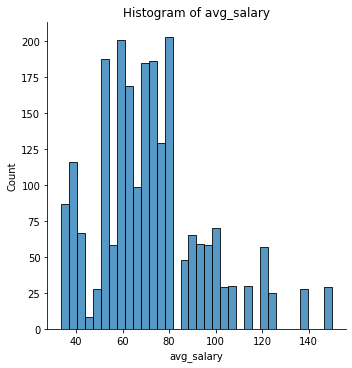

<Figure size 504x504 with 0 Axes>

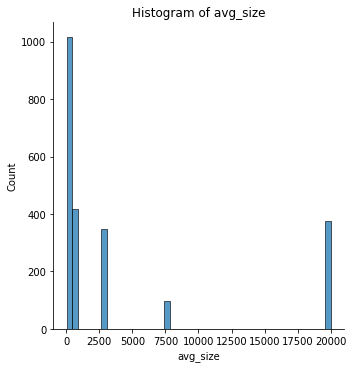

<Figure size 504x504 with 0 Axes>

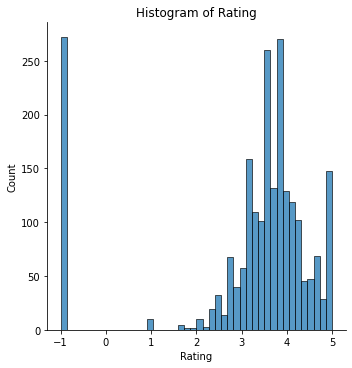

<Figure size 504x504 with 0 Axes>

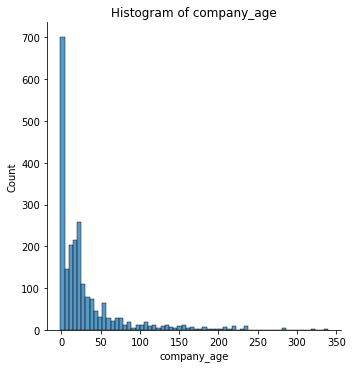

In [138]:
numerics=['avg_salary', 'avg_size', 'Rating', 'company_age']
for numeric in numerics: 
    histogram(df, numeric)

- Looks like the average salary may need to be scaled a bit in the model. 
- Most of the ratings are considerably high which is good. 
- The company ages look like they meed to be scaled as to not be underestimated. 

In [139]:
#company revenue affect the average salary? 
df.Revenue.value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            109
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [140]:
#sector affect average salary? 
df.Sector.value_counts()

Information Technology                570
Business Services                     523
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Travel & Tourism                  

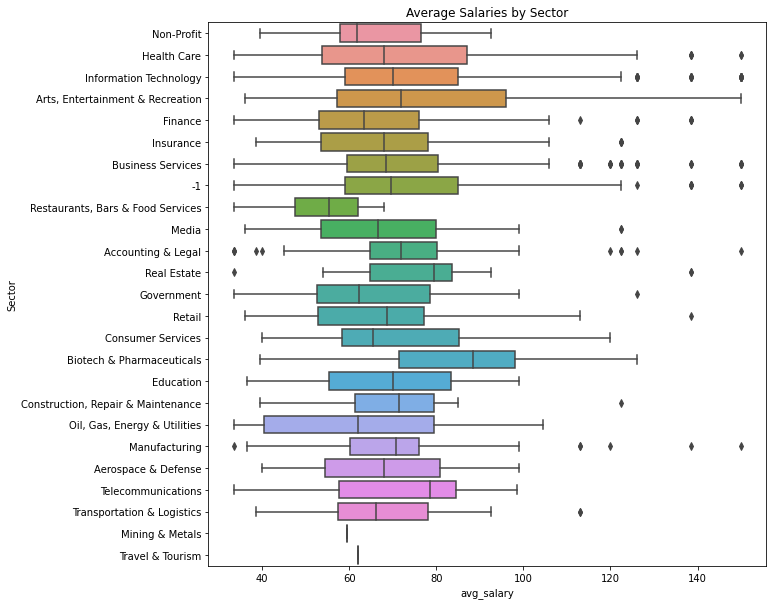

In [39]:
#box plot for sector and average salary 
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='avg_salary', y='Sector', orient='h')
plt.title('Average Salaries by Sector')
plt.savefig('avg_salary_sector.jpg', bbox_inches='tight')
plt.show()

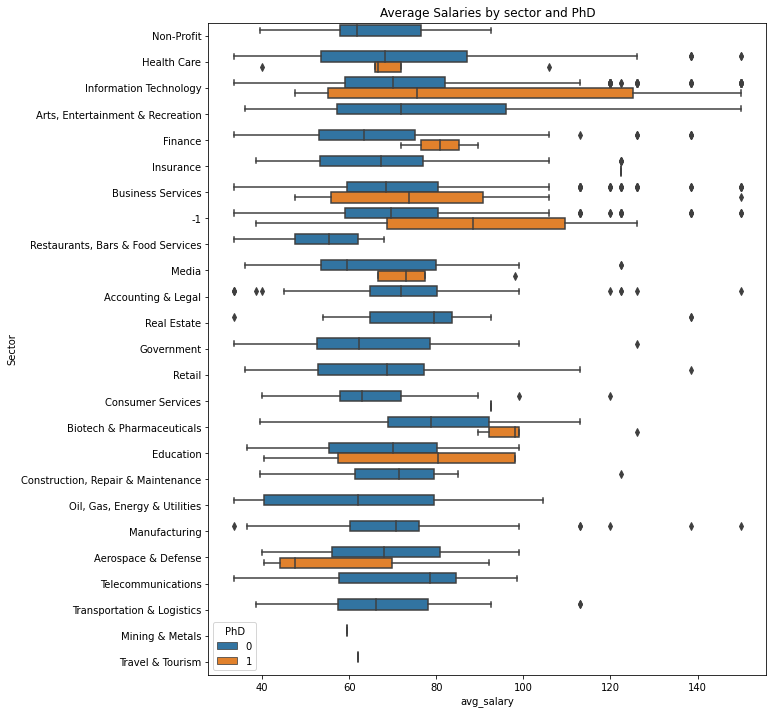

In [38]:
#relate the salary of data analyst with PhDs to the sector 

plt.figure(figsize=(10,12))
sns.boxplot(data=df, x='avg_salary', y='Sector', hue='PhD', orient='h')
plt.title('Average Salaries by sector and PhD')
plt.savefig('Avg_salary_sector_phd.jpg', bbox_inches='tight')
plt.show()

#looks like PhD can mostly get you a higher salary if the position requires it 

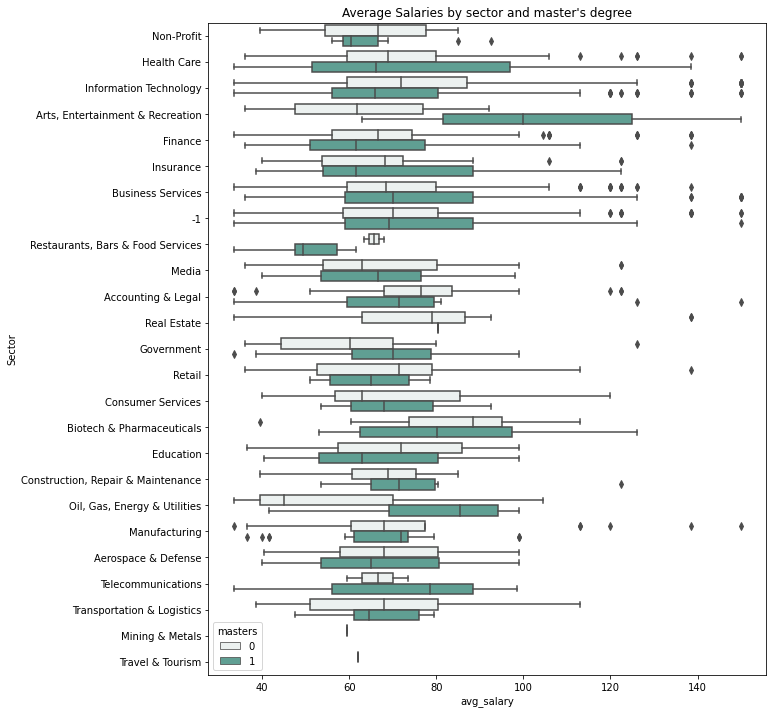

In [143]:
#similar thing as above but with masters degree 
plt.figure(figsize=(10,12))
sns.boxplot(data=df, x='avg_salary', y='Sector', hue='masters', orient='h', palette="light:#5A9")
plt.title("Average Salaries by sector and master's degree")
plt.show()
#looks like masters degree can get you a higher salary if the position requires it 

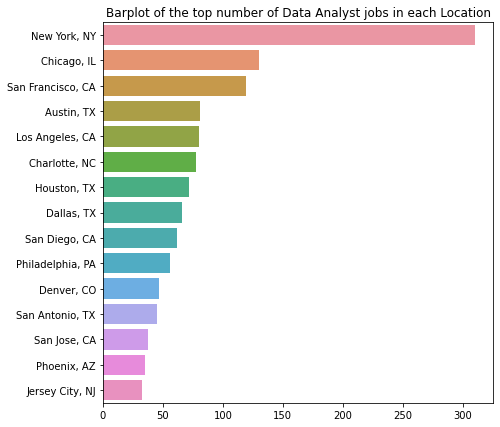

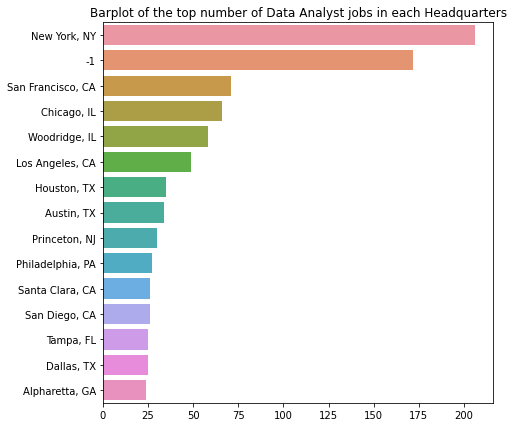

In [8]:
#which states and/or cities have the most data analyst related positions? 
for l in df[['Location', 'Headquarters']].columns:
    col=df[l].value_counts()[:15]
    plt.figure(figsize = (7,7))
    sns.barplot(y=col.index, x=col.values, orient='h')
    plt.title('Barplot of the top number of Data Analyst jobs in each %s' % l)
    plt.savefig('analyst_job_by_state.jpg',bbox_inches='tight')
    plt.show()

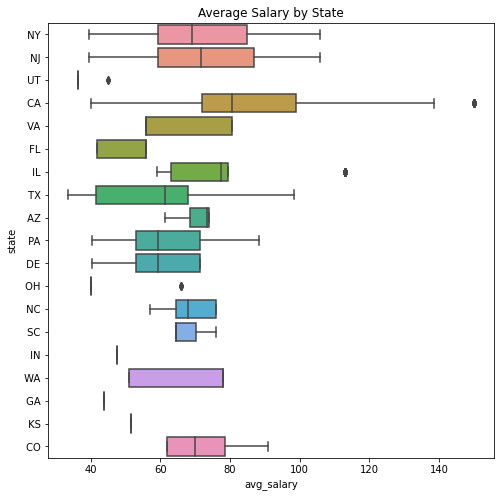

In [145]:
#which states have the highest and lowest salary positions? 
plt.figure(figsize=(8,8))
sns.boxplot(y='state', x='avg_salary', data=df, orient='h')
plt.title('Average Salary by State')
plt.show()

### Taking a deeper look at the skills needed for such data analyst positions. 

In [10]:
#look at simplified title and the required techniques, sql, excel, etc. use countplots 
def countplot(df, x, hue):
    plt.figure(figsize=(6,6))
    ax=sns.countplot(data=df, y=x, hue=hue, orient='h')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title('Countplot of the jobs that require %s' % hue )
    plt.show()

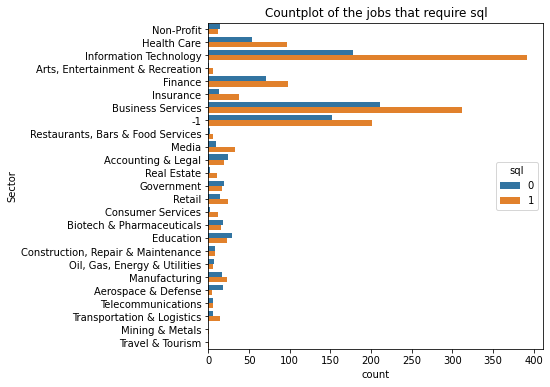

<Figure size 432x288 with 0 Axes>

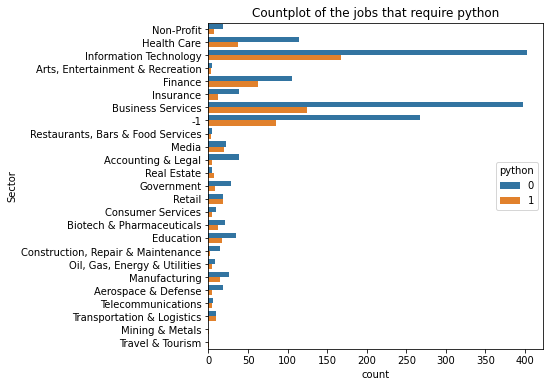

<Figure size 432x288 with 0 Axes>

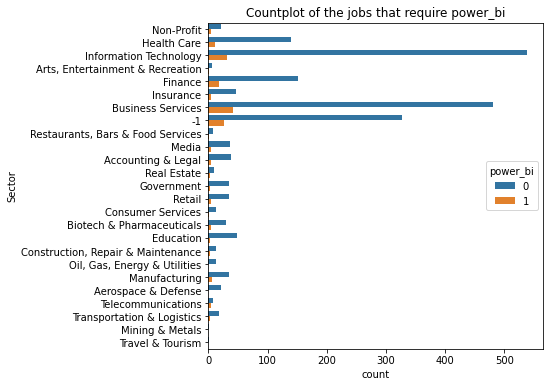

<Figure size 432x288 with 0 Axes>

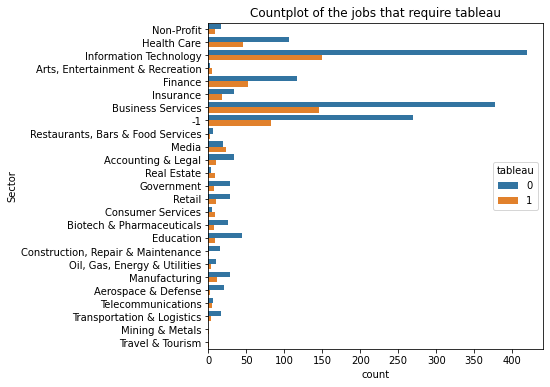

<Figure size 432x288 with 0 Axes>

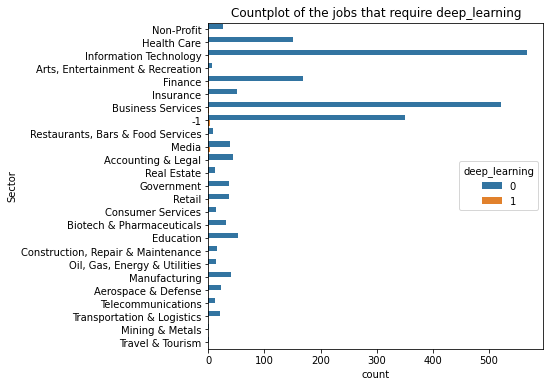

<Figure size 432x288 with 0 Axes>

In [12]:
#see the skills that are required most in each sector
skills=['sql', 'python', 'power_bi', 'tableau', 'deep_learning']
for skill in skills: 
    countplot(df, 'Sector', skill)
#interesting that tableau is definitely the more desired of the visualization tools 

- Some items to takeway: 
    - SQL is without doubt one of the most important skills to have for data analyst positions. 
    - Python is also desirable to have in the tool belt. 
    - Tableau is more desired than the Power BI for the visualization tool. 
    - Deep learning is not really required. 

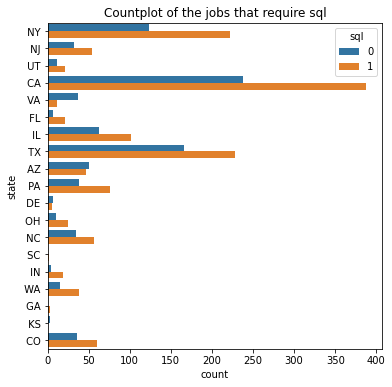

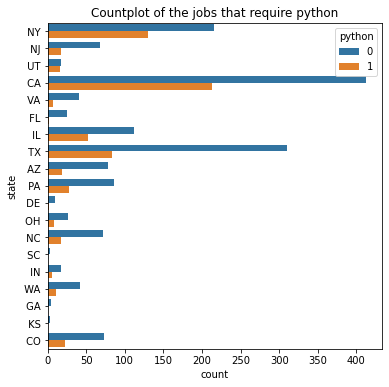

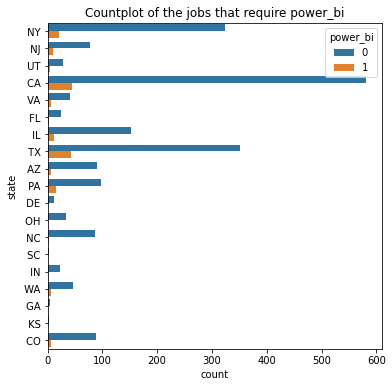

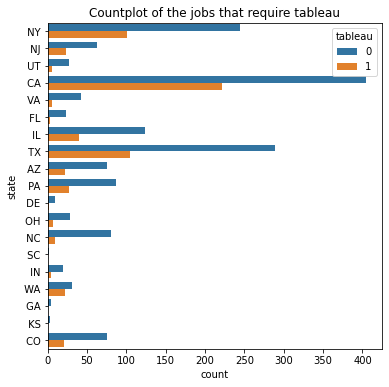

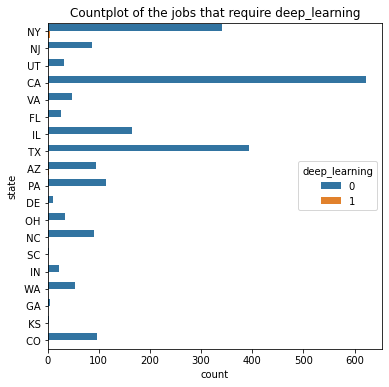

In [148]:
#see the skills that are required most in each state
skills=['sql', 'python', 'power_bi', 'tableau', 'deep_learning']
for skill in skills: 
    countplot(df, 'state', skill)

In [149]:
def boxplot(df, x, y, hue):
    plt.figure(figsize=(10,9))
    sns.boxplot(x=x, y=y, hue=hue, orient='h', data=df)
    plt.title('Countplot of the jobs that require %s' % hue )
    plt.show()

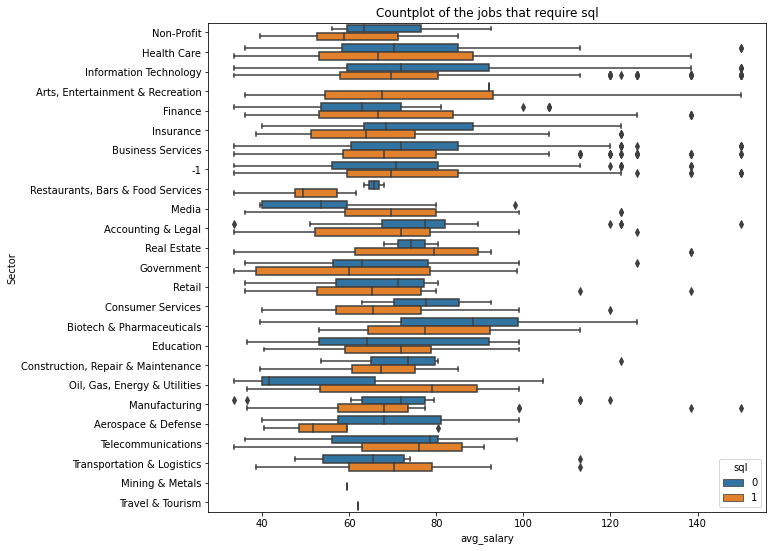

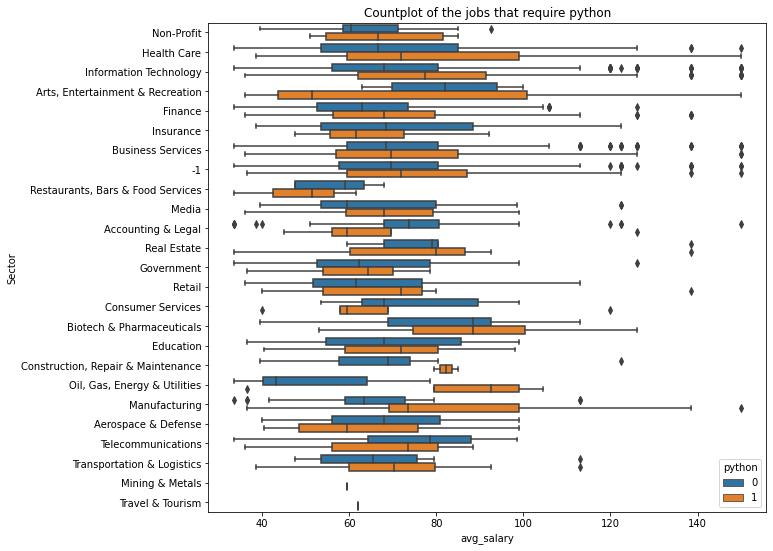

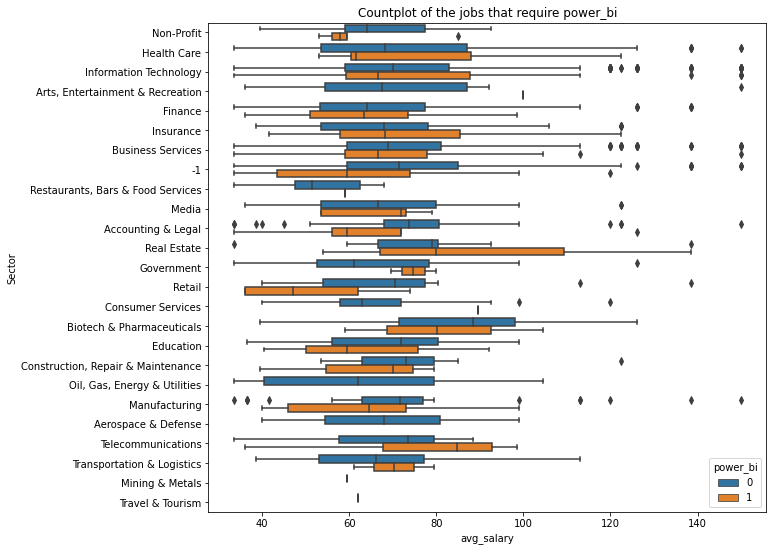

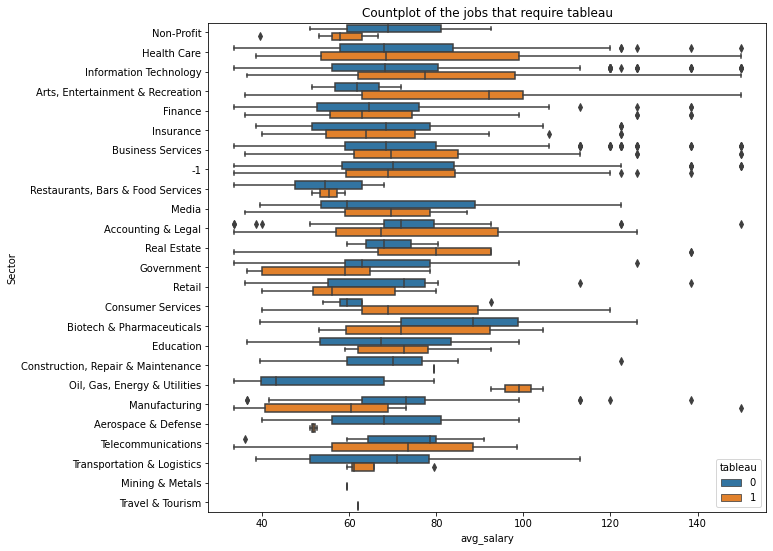

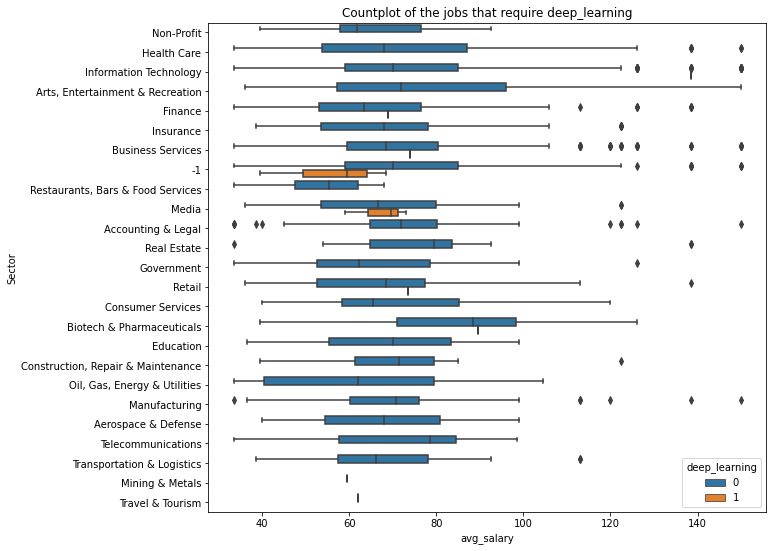

In [150]:
for skill in skills: 
    boxplot(df, x='avg_salary', y='Sector', hue=skill)

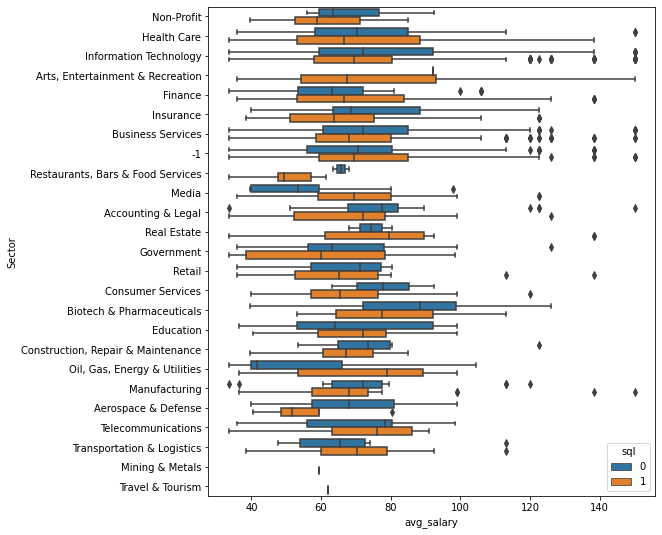

In [37]:
#box plot relating the average salaries, to the sector and whether or not SQL is desired. 
plt.figure(figsize=(8,9))
sns.boxplot(data=df, x='avg_salary', y='Sector', hue='sql', orient='h')
plt.savefig('sql_avg_salaries.jpg', bbox_inches='tight')
plt.show()

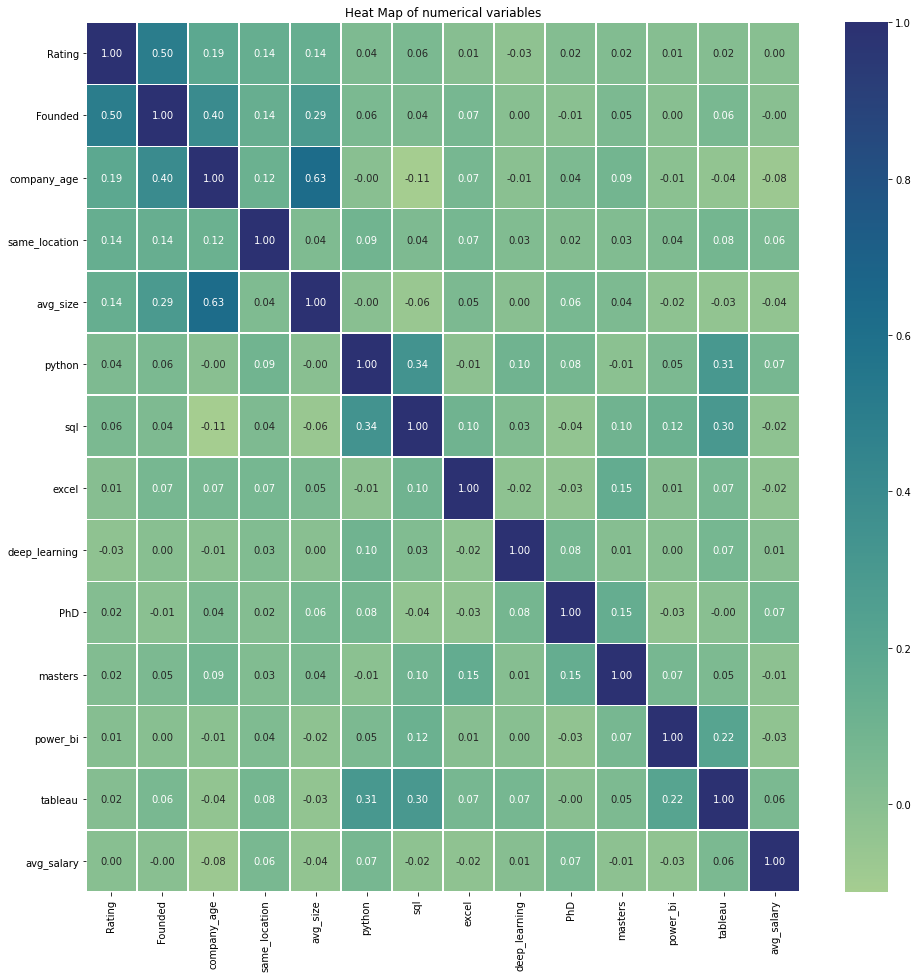

In [152]:
#make a heat map for sure relating all the variables together. Eliminate some multicollinearity 
#create a heatmap to see if there is any relationship between the numerical variables. 

heatmap_feats=['Rating', 'Founded', 'company_age', 'same_location', 'avg_size', 'python', 'sql', 
               'excel','deep_learning', 'PhD', 'masters', 'power_bi', 'tableau', 'avg_salary']
plt.figure(figsize=(16,16))
cmap=sns.color_palette("crest", as_cmap=True)
sns.heatmap(df[heatmap_feats].corr(), annot=True, fmt = ".2f", linewidth=0.5, cmap=cmap)
plt.title('Heat Map of numerical variables')
plt.show()


From this heat map, it seems that none of the variables are too linearly related to the average salary column. It does look like there could be some interdependency between the avg_size and company_age, company age and founded, and founded and rating. This means we can more than likely eliminate the 'Founded' column from consideration. That will remove two of the interdependencies. We can also eliminate the avg_size variable since it too closely correlated with the company_age column and is has a smaller correlation with our target variable. Our new heatmap would look like the following: 

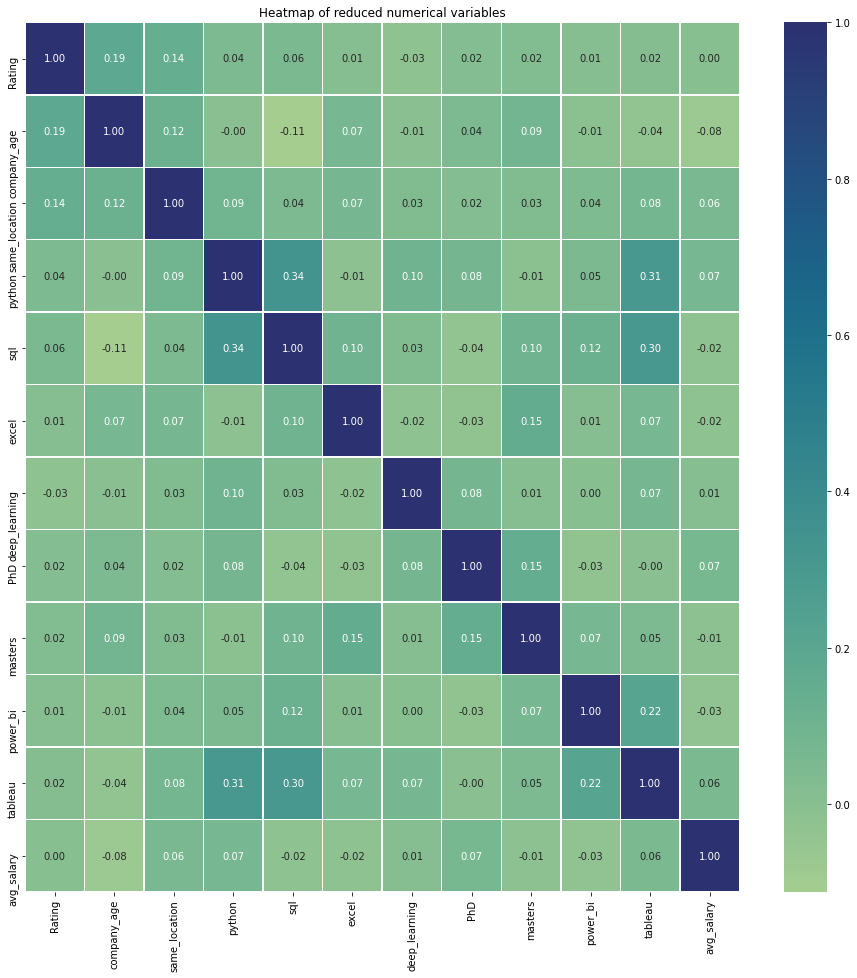

In [153]:
updated_heatmap_feats=['Rating', 'company_age', 'same_location', 'python', 'sql', 
               'excel','deep_learning', 'PhD', 'masters', 'power_bi', 'tableau', 'avg_salary']
plt.figure(figsize=(16,16))
cmap=sns.color_palette("crest", as_cmap=True)
sns.heatmap(df[updated_heatmap_feats].corr(), annot=True, fmt = ".2f", linewidth=0.5, cmap=cmap)
plt.title('Heatmap of reduced numerical variables')
plt.show()

There looks to still be some slight interdependency between python, SQL, and Tableau but it's not as drastic as before. Let's leave it in and will come back to rexamine if needed. 

In [10]:
#pivot tables sectors to average salaries
pd.pivot_table(data=df, index=['Sector'],
               values=['avg_salary'], aggfunc='mean').sort_values(by='avg_salary', ascending=False)

,avg_salary
Sector,
Biotech & Pharmaceuticals,83.106061
Real Estate,80.916667
"Arts, Entertainment & Recreation",80.642857
Accounting & Legal,75.220930
Information Technology,74.247368
Health Care,72.807947
-1,72.699717
Business Services,72.273423
Manufacturing,72.075000


Interesting to analyze the average salaries by sector. Biotech being at top is not suprprising as well 
as non profits being towards the bottom. A bit surprising that oil and energy sectors were as low as they were. You would expect them to be a bit higher in my opinion. Art and entertainment being as high as they were is also surprising, I would expect them to be a bit lower. 

In [155]:
#age of company and the sector 
#pivot tables sectors to average salaries
pd.pivot_table(data=df, index=['Sector'],
               values=['company_age'], aggfunc='mean').sort_values(by='company_age', ascending=False)

,company_age
Sector,
Education,101.192308
Finance,89.633136
Government,53.805556
Telecommunications,51.545455
Health Care,48.582781
Manufacturing,48.125000
Insurance,46.588235
Retail,46.236842
Non-Profit,43.500000


Much of this is not really too surprising. Education being as old as it is is what one would expect along with food establishments being towards the bottom. 

In [171]:
#can we gather something from the means of the average salaries for each company, would that be better? 
pd.pivot_table(df, index='Type of ownership', values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)

,avg_salary
Type of ownership,
Hospital,81.710526
Unknown,73.593750
-1,73.469325
College / University,73.338235
Company - Public,72.701327
Contract,72.500000
Company - Private,72.499607
Private Practice / Firm,71.611111
Other Organization,70.692308


Interesting that hospitals and higher education are near the top of the average salaries. Not really too surprising that the government and school districts are towards the bottom. 


In [174]:
#can we gather something from the means of the average salaries for each type of industry? 

pd.set_option('display.max_rows', None)
pd.pivot_table(df, index='Industry', values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)

,avg_salary
Industry,
Drug & Health Stores,95.250000
Education Training Services,92.833333
Health Care Products Manufacturing,89.800000
Sports & Recreation,88.166667
Gambling,88.000000
News Outlet,87.000000
Transportation Equipment Manufacturing,85.000000
Electrical & Electronic Manufacturing,84.666667
Utilities,83.250000


Much of this information seems reasonable. Health care being towards the top is consistent with what we have seen so far. Can be a little duplicative though. Something to keep in mind modeling wise. 

In [24]:
#get the relative count of the number of times each state appears in the data. 
state_count=df.state.value_counts()
state_dict={'state':state_count.index, 'count in data': state_counts.values}
pd.DataFrame(state_dict)

,state,count in data
0,CA,626
1,TX,394
2,NY,345
3,IL,164
4,PA,114
5,AZ,97
6,CO,96
7,NC,90
8,NJ,86
9,WA,53


In [156]:
#check the average salary by state 
#company state, the average salary and the seniority 
pd.pivot_table(data=df, index=['state'],
               values=['avg_salary'], aggfunc='mean').sort_values(by='avg_salary', ascending=False)

,avg_salary
state,
CA,88.432109
IL,78.310976
CO,73.505208
NJ,73.000000
NY,71.411594
AZ,70.788660
SC,68.333333
NC,68.111111
VA,65.187500


California being at the top here isn't a surprise, they tend to put out some of the highest jobs because of the cost of living. Texas being below average is a bit surprising, I would've expected a bit more with it being a big state. Ohio being towards the bottom is also surprising. Many data analyst jobs in Columbus so that number seems uncharacteristically low. 

In [157]:
#company state, the average salary and the seniority 
state_senior_pivot=pd.pivot_table(data=df, index=['state'],
               values=['avg_salary'], columns=['seniority'], aggfunc='mean')
state_senior_pivot.reindex(state_senior_pivot['avg_salary'].sort_values(by='jr', ascending=False).index)

avg_salary                      
seniority         jr         na     senior
state                                     
 CA        79.464286  92.041387  79.415152
 NY        75.750000  70.038168  75.746753
 CO        72.250000  72.250000  79.781250
 NC        72.000000  67.493590  72.150000
 DE        71.500000  53.000000  71.500000
 AZ        71.000000  70.822785  70.593750
 IL        64.750000  76.211207  86.047619
 VA        60.083333  63.112903  73.818182
 WA        60.000000  62.368421  73.500000
 NJ        59.500000  72.666667  74.868421
 TX        56.350000  57.239683  66.000000
 PA        53.100000  61.215909  65.928571
 FL        47.600000  52.111111  56.000000
 IN        47.500000  47.500000  47.500000
 GA        44.000000  44.000000        NaN
 OH        40.000000  44.482759  53.000000
 UT        36.500000  37.180000  38.928571
 KS              NaN  51.500000        NaN
 SC              NaN  68.333333        NaN

In [158]:
#gather a better understanding between the average salary and specific title that is given 
pd.pivot_table(data=df, values=['avg_salary'], index=['simplified_title'] , aggfunc='mean')b

,avg_salary
simplified_title,
business analyst,67.560000
data analyst,72.504098
data engineer,73.350000
data management,69.065789
data scientist,63.328947
data security analyst,81.041667
data warehouse enginner,74.660000
other,71.816804
risk analyst,66.625000


In [29]:
#gather a better understanding between the average salary and specific title that is given 
pd.pivot_table(data=df, values=['Rating'], index=['simplified_title'] , aggfunc='mean').sort_values(by='Rating', ascending=False)

,Rating
simplified_title,
data management,3.418421
data warehouse enginner,3.376000
other,3.247658
data analyst,3.143794
data scientist,3.123684
data engineer,3.120000
business analyst,2.990000
data security analyst,2.791667
risk analyst,2.600000


Interesting that the security labeled jobs have receive the highest income. Moreover, the 'data scientist' receive the least. Moreover, it looks like data management jobs have higher ratings. Some correlation between the risk analyst having lower salaries and the lower ratings. 

In [159]:
#can we get a better understanding of the specific job title and the average salary? 
pd.pivot_table(data=df, values=['avg_salary'], index=['simplified_title' , 'seniority'] , aggfunc='mean')

avg_salary
simplified_title        seniority            
business analyst        na          65.944444
                        senior      71.714286
data analyst            jr          63.231343
                        na          72.133046
                        senior      75.485014
data engineer           na          77.000000
                        senior      64.833333
data management         jr          56.000000
                        na          70.892857
                        senior      64.833333
data scientist          na          60.796296
                        senior      69.545455
data security analyst   na          80.136364
                        senior      91.000000
data warehouse enginner jr          53.250000
                        na          73.925000
                        senior      93.833333
other                   jr          72.333333
                        na          71.773196
                        senior      71.978261
risk analyst            na          57.250000
                        senior      76.000000

It looks like the data is saying that the positions with 'Data Analyst' tend to have about an average salary even at the senior level. IF we look here, the data security analyst tend to pay much more than the average data analyst position. 

In [160]:
#for those jobs that require python, SQL, tableau, power BI, and deep learning, is there a increase in pay for one
#ove the other? 
skills=['sql', 'python', 'power_bi', 'tableau', 'deep_learning']

for skill in skills: 
    print(pd.pivot_table(data=df, values='avg_salary', index=skill))
#Essentially make the same average salary with sql skills, python skills, etc. 

     avg_salary
sql            
0     72.737414
1     71.733309
        avg_salary
python            
0        71.093189
1        74.733909
          avg_salary
power_bi            
0          72.320946
1          69.844444
         avg_salary
tableau            
0         71.317402
1         74.243548
               avg_salary
deep_learning            
0               72.114012
1               73.954545


In [161]:
#relate the revenue to the average salary 
pd.pivot_table(df, index='Revenue', values='avg_salary').sort_values(by='avg_salary', ascending=False)

,avg_salary
Revenue,
$1 to $5 million (USD),75.941441
$25 to $50 million (USD),74.651376
$5 to $10 billion (USD),73.732143
Unknown / Non-Applicable,73.496748
-1,73.469325
$100 to $500 million (USD),71.830275
$2 to $5 billion (USD),71.794574
Less than $1 million (USD),70.903226
$10 to $25 million (USD),70.553030


One thing that is really interesting to note is that the companies that gross the most revenue are not necessarily the ones who pay the highest salaries for data analyst. Interesting that one of the lower grossing revenue companies at 1-5 million pay the highest salary on average. 

In [162]:
#can we gather something from the means of the average salaries for each company, would that be better? 
pd.pivot_table(df, index='Revenue', values='avg_salary', aggfunc='median').sort_values(by='avg_salary', ascending=False)

,avg_salary
Revenue,
-1,72.00
$1 to $5 million (USD),71.50
$25 to $50 million (USD),70.00
Unknown / Non-Applicable,70.00
$1 to $2 billion (USD),69.00
$5 to $10 million (USD),69.00
$10 to $25 million (USD),68.75
$10+ billion (USD),68.50
$5 to $10 billion (USD),68.25


Very similar to before; the 1-5 million revenue company is still one of the higher grossing median average salary companies.   50-100 million is still towards the bottom. 

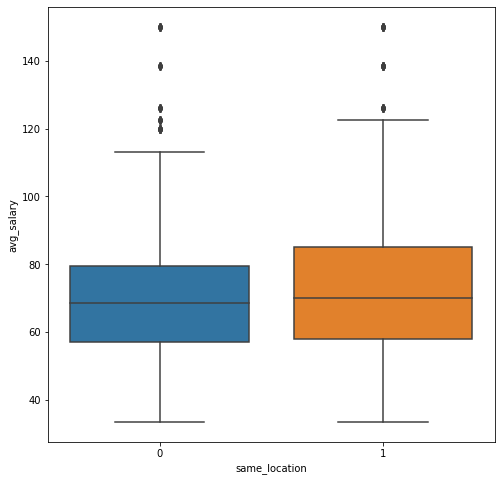

In [165]:
#Is the fact that the position in the same location as the headquarter a factor? 
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='same_location', y='avg_salary')
plt.show()
#Looks like being in the same location does result in a slightly higher salary. Good to know. 